In [2]:
%pip install numpy==1.24.1
%pip install pandas==1.5.3
%pip install seaborn==0.12.2
%pip install scikit-learn==1.2.0
%pip install plotly==5.12.0
%pip install matplotlib==3.6.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn libraries
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score 

In [4]:
# Importing the dataset
df = pd.read_csv('../Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [5]:
# Dropping the title column
df.drop(['title'], inplace=True, axis=1)

In [6]:
# Fixing a typo in the dataset
df.rename(columns={"strong_janguage": "strong_language"}, inplace=True)

In [7]:
# Checking for null values and get all the unique values in the dataset
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [8]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
SEED = 42

In [11]:
# Initializing the classifiers 
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=20, max_depth=11, random_state=SEED)
clf3 = GaussianNB()
clf4 = SVC(kernel='rbf', probability=True, random_state=SEED)
clf5 = KNeighborsClassifier()

In [12]:
# Training the classifiers
clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
clf4 = clf4.fit(X, y)
clf5 = clf5.fit(X, y)

In [13]:
# Initializing the voting classifier
eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('GB', clf3), ('SVC', clf4), ('KNN', clf5)],
                        voting='soft')

In [14]:
# Training the voting classifier
eclf = eclf.fit(X, y)

In [15]:
# Getting the predictions from the voting classifier
y_pred = eclf.predict(X_test)

In [16]:
# creating a confusion matrixf
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'ESRB Rating')

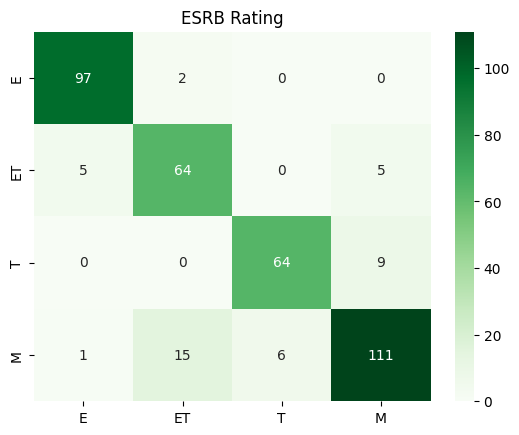

In [17]:
# Printing the classification report
Labels = ["E","ET","T","M"] # labels for x-axis
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels).set_title('ESRB Rating')

In [18]:
# Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           E       0.94      0.98      0.96        99
          ET       0.79      0.86      0.83        74
           M       0.91      0.88      0.90        73
           T       0.89      0.83      0.86       133

    accuracy                           0.89       379
   macro avg       0.88      0.89      0.89       379
weighted avg       0.89      0.89      0.89       379

